In [3]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Fetch Data

In [4]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']
X, y = np.array(X) / 255.0, np.array(y, dtype=int)
X, y = X[:6000], y[:6000]

## Define KNN for one k

In [5]:
loo = LeaveOneOut()
def knn(k):
	acc = []
	for train_index, test_index in loo.split(X):
		X_train, X_test = X[train_index], X[test_index]
		y_train, y_test = y[train_index], y[test_index]
		knn = KNeighborsClassifier(n_neighbors=k)
		knn.fit(X_train, y_train)
		y_pred = knn.predict(X_test)
		acc.append(accuracy_score(y_test, y_pred))
	mean = np.mean(acc)
	return mean

k_values = range(1, 11)
acc = []
for k in k_values:
	acc.append(knn(k))

optimal = k_values[np.argmax(acc)]
print('Optimal k:', optimal)


Optimal k: 1


## Plot the results

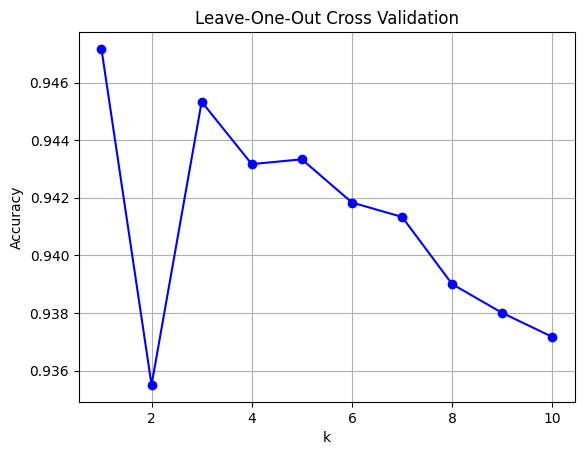

In [6]:
plt.plot(k_values, acc, marker='o', linestyle='-', color='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Leave-One-Out Cross Validation')
plt.grid()
plt.show()